In [317]:
df.to_csv("raw_data.csv", index=False)

In [318]:
df = pd.read_csv("raw_data.csv")

In [184]:
from sklearn.preprocessing import StandardScaler

In [185]:
from sklearn.preprocessing import MinMaxScaler

In [186]:
from sklearn.preprocessing import PowerTransformer

In [187]:
from sklearn.preprocessing import QuantileTransformer

In [190]:
y = df["RON损失\n（不是变量）"]

sample_index
1      1.38
2      1.18
3      1.38
4      1.38
5      1.28
       ... 
321    1.15
322    1.25
323    1.35
324    1.28
325    1.25
Name: RON损失\n（不是变量）, Length: 325, dtype: float64

In [191]:
X_ = df.copy()

In [192]:
y = X_.pop("RON损失\n（不是变量）")

In [194]:
X_.pop("time")

sample_index
1      2020/5/26 8:00:00
2      2020/5/21 8:00:00
3      2020/5/19 8:00:00
4      2020/5/14 8:00:00
5      2020/5/12 8:00:00
             ...        
321    2017/4/26 8:00:00
322    2017/4/24 8:00:00
323    2017/4/21 8:00:00
324    2017/4/19 8:00:00
325    2017/4/17 8:00:00
Name: time, Length: 325, dtype: object

In [197]:
X = X_

In [198]:
from sklearn.preprocessing import StandardScaler

In [199]:
from sklearn.pipeline import Pipeline

In [200]:
from sklearn.decomposition import PCA, FastICA

In [229]:
from sklearn.linear_model import Ridge

In [239]:
!pip install lightgbm

In [204]:
from sklearn.model_selection import KFold, train_test_split

In [210]:
X = X.astype(float)

In [223]:
y = y.astype(float).to_numpy()

In [224]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [228]:
y_train.dtype

dtype('float64')

In [261]:
from lightgbm import LGBMRegressor

In [264]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor

In [269]:
from sklearn.linear_model import ElasticNet, BayesianRidge

In [293]:
from sklearn.feature_selection import SelectFromModel

In [294]:
pipeline = Pipeline([
    ("scale", StandardScaler()),
    ("transform", QuantileTransformer(n_quantiles=2000)),
#     ("select", SelectFromModel(estimator=ExtraTreesRegressor())),
    ("pca", PCA(n_components=30)),
    ("ica", FastICA(n_components=15)),
#     ("regressor", LGBMRegressor(normali2ze=True)),
    ("regressor", BayesianRidge(normalize=True)),
])

In [295]:
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

c:\software\miniconda3\lib\site-packages\sklearn\preprocessing\_data.py:2370: UserWarning: n_quantiles (2000) is greater than the total number of samples (217). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
c:\software\miniconda3\lib\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


0.08076621349631641

In [296]:
y_pred = pipeline.predict(X_test)

In [299]:
from sklearn.model_selection import cross_val_score

In [297]:
import pylab as plt

In [306]:
cv = KFold(n_splits=10, shuffle=True, random_state=0)

In [307]:
cross_val_score(pipeline, X, y, cv=cv)

c:\software\miniconda3\lib\site-packages\sklearn\preprocessing\_data.py:2370: UserWarning: n_quantiles (2000) is greater than the total number of samples (292). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
c:\software\miniconda3\lib\site-packages\sklearn\preprocessing\_data.py:2370: UserWarning: n_quantiles (2000) is greater than the total number of samples (292). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
c:\software\miniconda3\lib\site-packages\sklearn\preprocessing\_data.py:2370: UserWarning: n_quantiles (2000) is greater than the total number of samples (292). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
c:\software\miniconda3\lib\site-packages\sklearn\preprocessing\_data.py:2370: UserWarning: n_quantiles (2000) is greater than the total number of samples (292). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
c:\software\miniconda3\lib\site-packages\sklearn\preprocessing\_data.py:2370: UserWa

array([ 0.21045112,  0.03269815, -0.04535003,  0.09736183,  0.20442371,
        0.23811152, -0.03937034,  0.27178148,  0.15372001,  0.09015468])

In [308]:
_.mean()

0.12139821277330123

In [309]:
pipeline.fit(X, y)

c:\software\miniconda3\lib\site-packages\sklearn\preprocessing\_data.py:2370: UserWarning: n_quantiles (2000) is greater than the total number of samples (325). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


Pipeline(steps=[('scale', StandardScaler()),
                ('transform', QuantileTransformer(n_quantiles=2000)),
                ('select', SelectFromModel(estimator=ExtraTreesRegressor())),
                ('pca', PCA(n_components=30)),
                ('ica', FastICA(n_components=15)),
                ('regressor', BayesianRidge(normalize=True))])

In [310]:
y_pred = pipeline.predict(X)

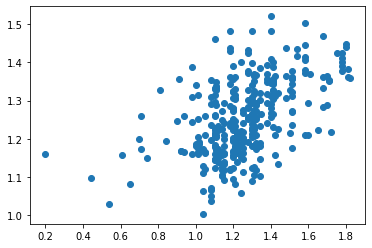

In [311]:
plt.scatter(y, y_pred)

In [315]:
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error

0.2551673906107038

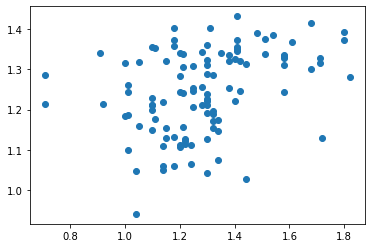

In [298]:
plt.scatter(y_test, y_pred)

In [248]:
QuantileTransformer?

Init signature:
QuantileTransformer(
    *,
    n_quantiles=1000,
    output_distribution='uniform',
    ignore_implicit_zeros=False,
    subsample=100000,
    random_state=None,
    copy=True,
)
Docstring:     
Transform features using quantiles information.

This method transforms the features to follow a uniform or a normal
distribution. Therefore, for a given feature, this transformation tends
to spread out the most frequent values. It also reduces the impact of
(marginal) outliers: this is therefore a robust preprocessing scheme.

The transformation is applied on each feature independently. First an
estimate of the cumulative distribution function of a feature is
used to map the original values to a uniform distribution. The obtained
values are then mapped to the desired output distribution using the
associated quantile function. Features values of new/unseen data that fall
below or above the fitted range will be mapped to the bounds of the output
distribution. Note that this tran